In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import to_hex
import seaborn as sns
from pre_processing_functions import preprocess

%load_ext autoreload
%autoreload 2

In [2]:
df = preprocess('customer_info.csv')

In [3]:
df

,Unnamed: 0,customer_id,customer_name,customer_gender,customer_birthdate,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,...,lifetime_spend_petfood,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,loyalty_card_number,latitude,longitude,customer_age,years_active,customer_educlevel
0,0.0,29930.0,April Clark,1.0,1972-01-15 14:27:00,2.0,2.0,1.0,4.0,7789.0,...,428.0,386.0,15.874075,2018.0,0.0,38.721807,-9.125534,53.0,7.0,None
1,1.0,6813.0,Paul Ketchum,0.0,1944-07-31 10:53:00,0.0,1.0,0.0,4.0,8653.0,...,226.0,73.0,122.789042,2013.0,1.0,38.734668,-9.163533,81.0,12.0,Bsc.
2,2.0,39451.0,Mary Downing,1.0,1989-11-13 14:11:00,2.0,3.0,0.0,7.0,15605.0,...,192.0,319.0,10.159789,2011.0,0.0,38.787126,-9.147077,36.0,14.0,None
3,3.0,21557.0,Manuel Kueny,0.0,1976-08-09 06:23:00,0.0,0.0,1.0,1.0,13440.0,...,270.0,221.0,25.994254,2009.0,0.0,38.741816,-9.159700,49.0,16.0,None
4,4.0,16415.0,Curtis Tharp,0.0,1966-07-11 08:12:00,1.0,1.0,1.0,5.0,49250.0,...,144.0,244.0,31.782174,2012.0,1.0,38.785921,-9.149221,59.0,13.0,Phd.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34055,34055.0,37071.0,Mary Diaz,1.0,1999-01-20 18:47:00,1.0,1.0,0.0,2.0,62321.0,...,258.0,163.0,16.233149,2018.0,0.0,38.750813,-9.103808,26.0,7.0,None
34056,34056.0,27422.0,John Gross,0.0,1984-08-01 19:50:00,1.0,1.0,0.0,3.0,16084.0,...,319.0,379.0,61.417938,2019.0,1.0,38.745020,-9.169168,41.0,6.0,None
34057,34057.0,39540.0,Kathleen Harper,1.0,2000-09-16 07:22:00,1.0,0.0,1.0,2.0,14631.0,...,110.0,228.0,53.561736,2018.0,0.0,38.767834,-9.172368,25.0,7.0,None
34058,34058.0,18367.0,Jenny Landry,1.0,1961-04-09 10:52:00,1.0,1.0,1.0,4.0,37420.0,...,376.0,151.0,43.501363,2015.0,1.0,38.732462,-9.156155,64.0,10.0,Msc.


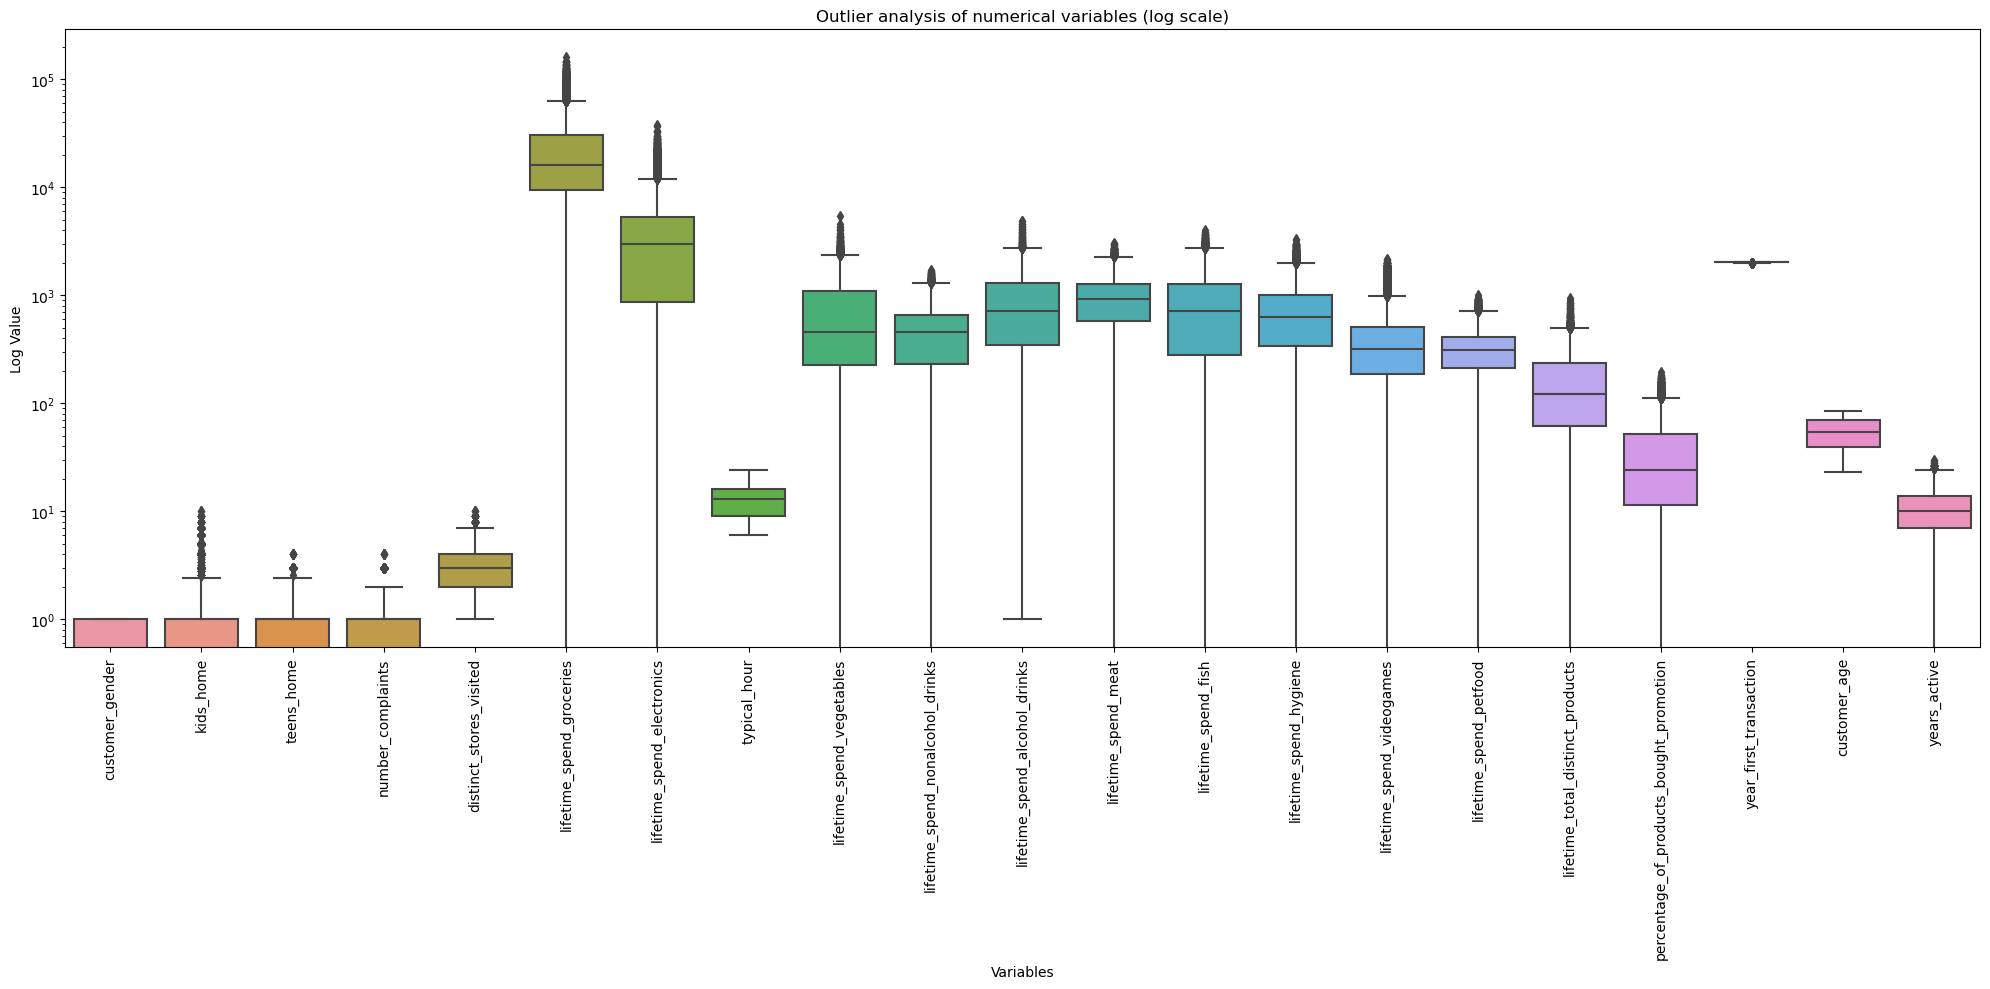

In [4]:
colunas_excluir = ['Unnamed: 0', 'customer_id', 'loyalty_card_number', 'latitude', 'longitude']
df_new = df.drop(columns=[col for col in colunas_excluir if col in df.columns])

df_numerico = df_new.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(20, 10))
sns.boxplot(data=df_numerico, orient='v')
plt.yscale('log')
plt.xticks(rotation=90)
plt.title('Outlier analysis of numerical variables (log scale)')
plt.ylabel('Log Value')
plt.xlabel('Variables')
plt.tight_layout()
plt.show()

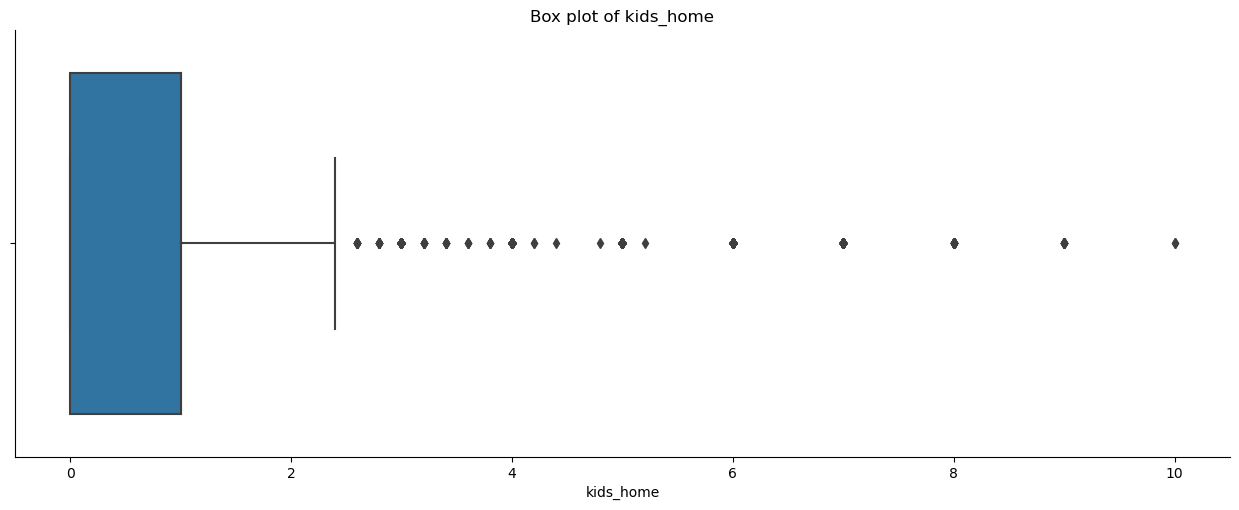

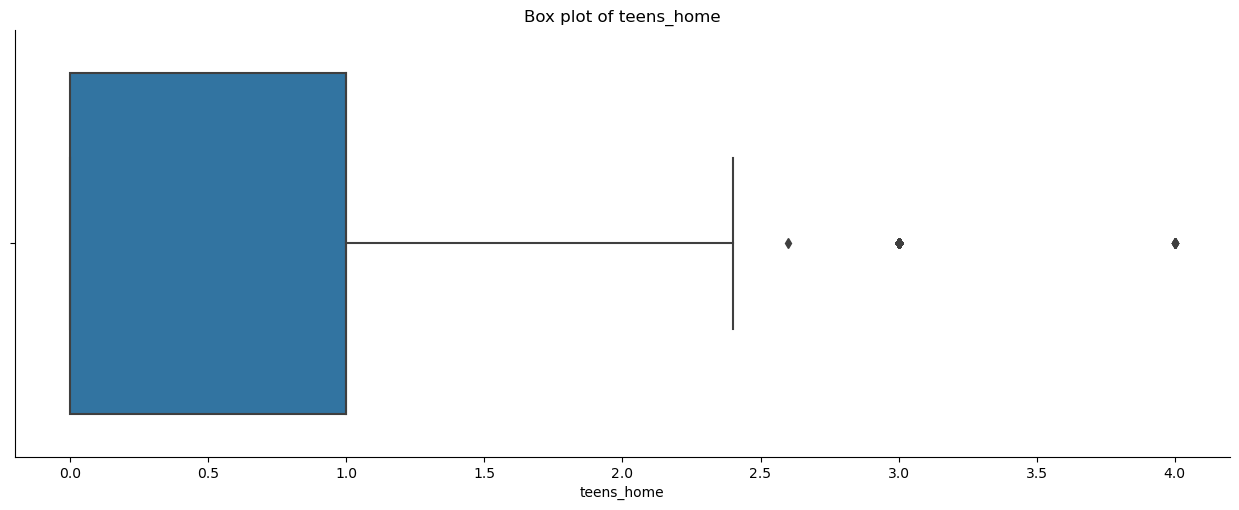

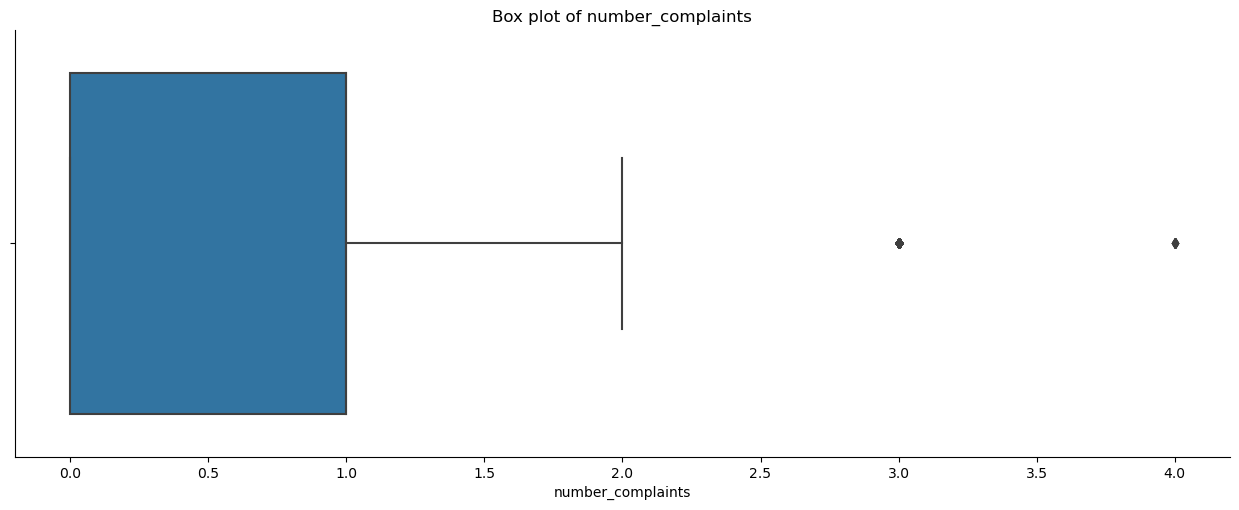

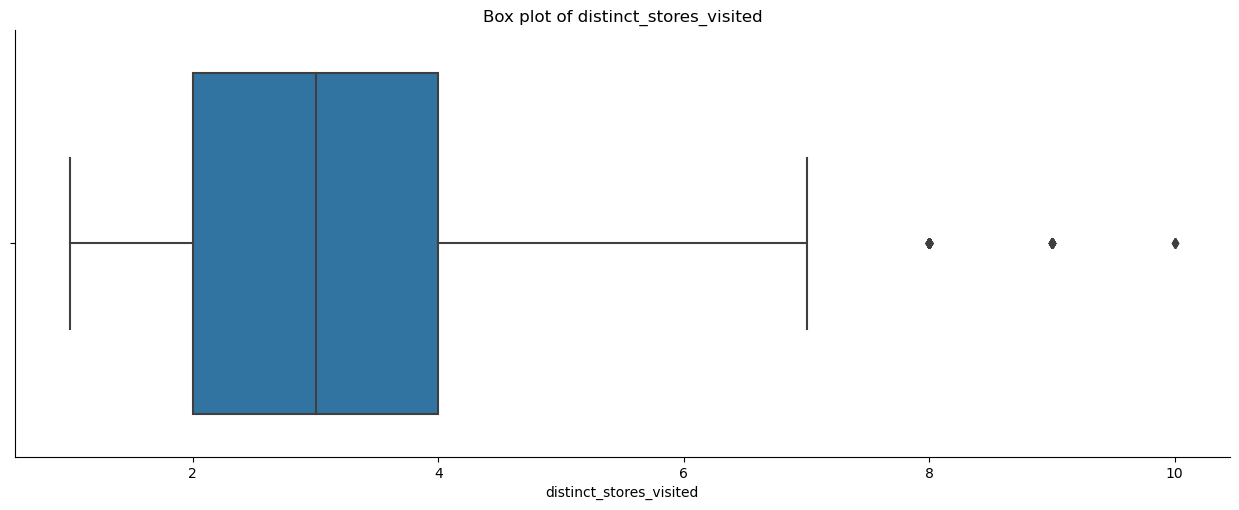

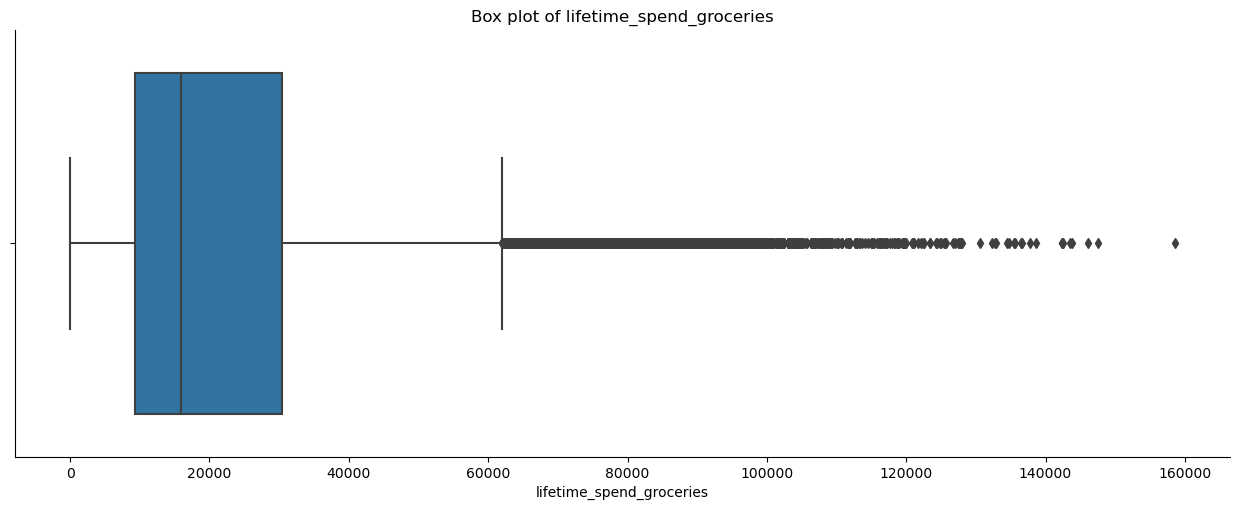

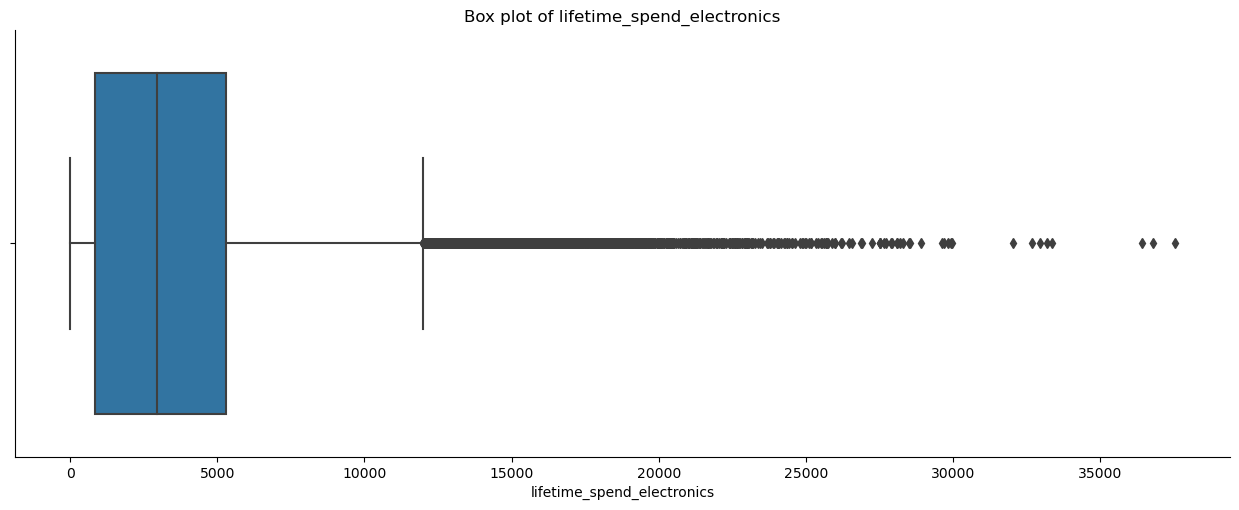

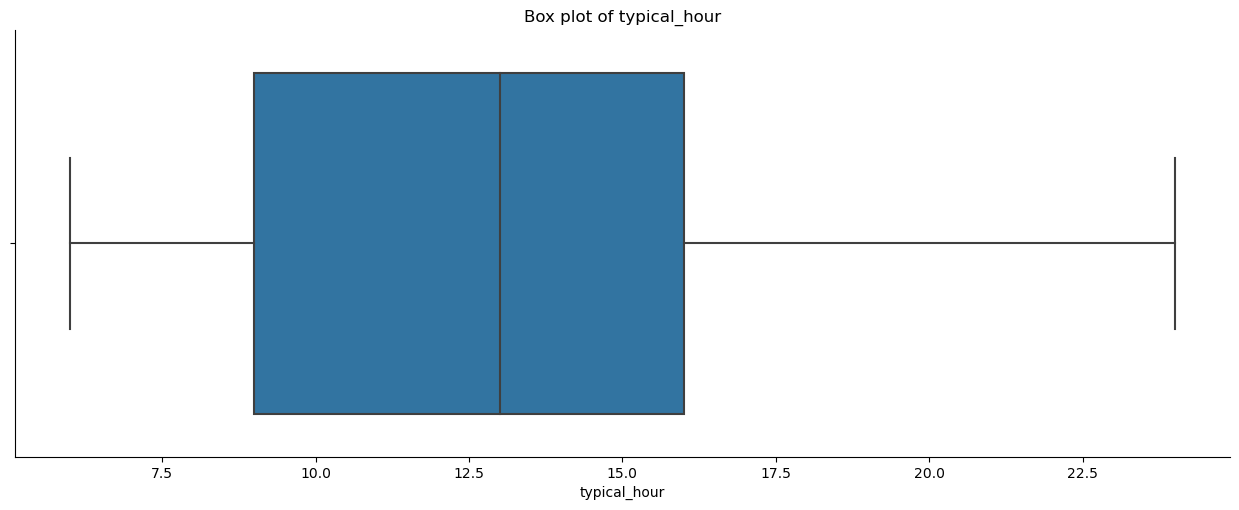

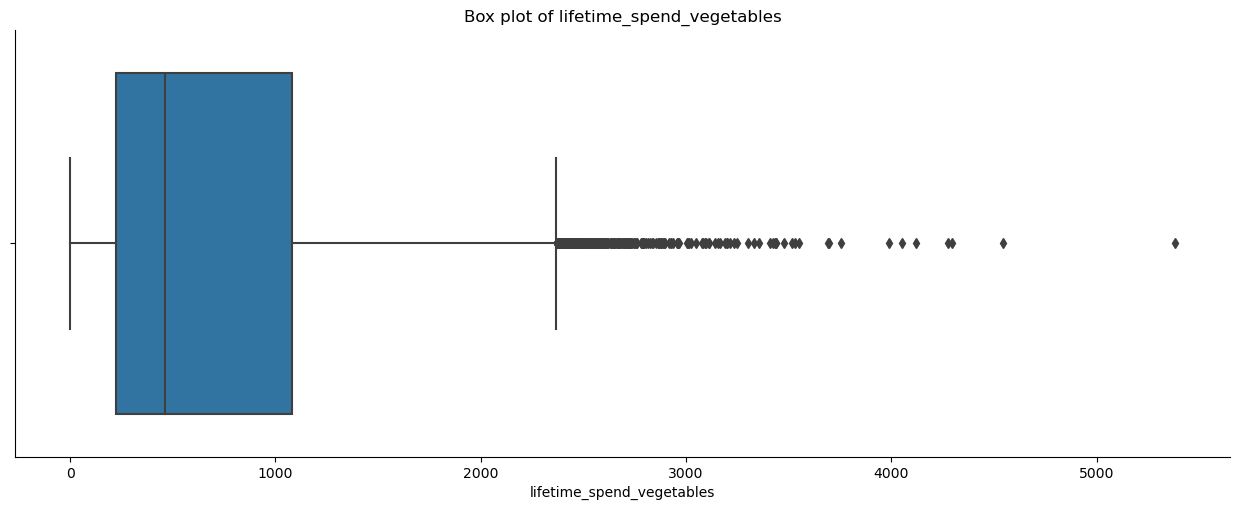

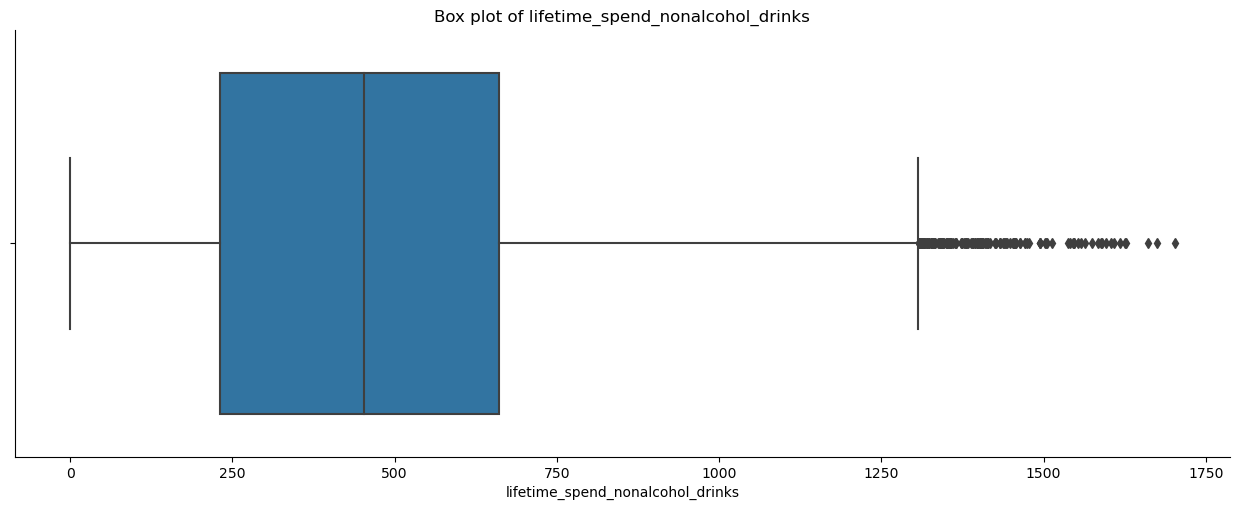

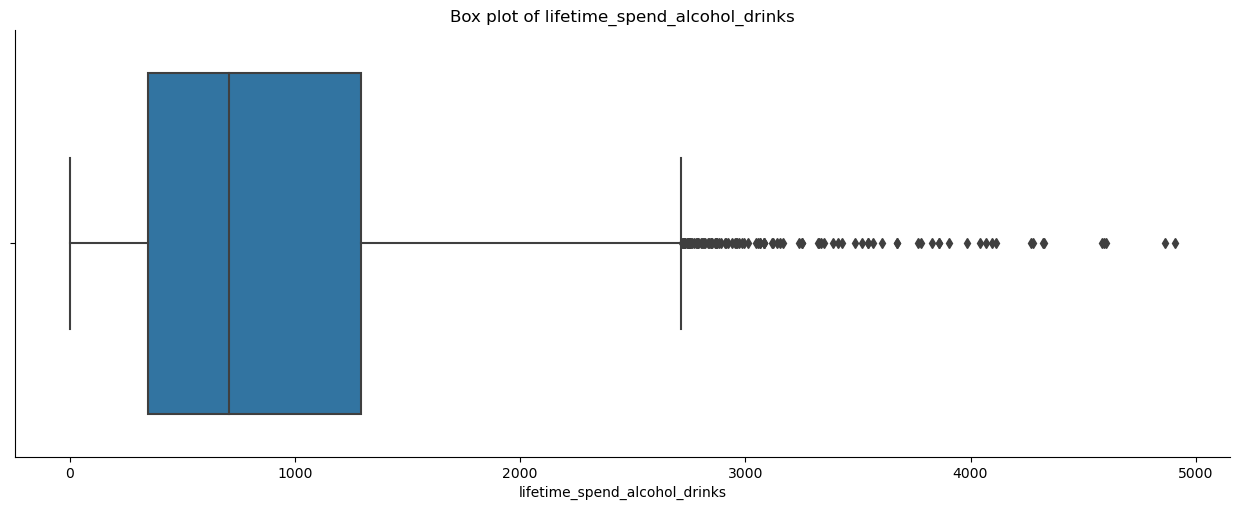

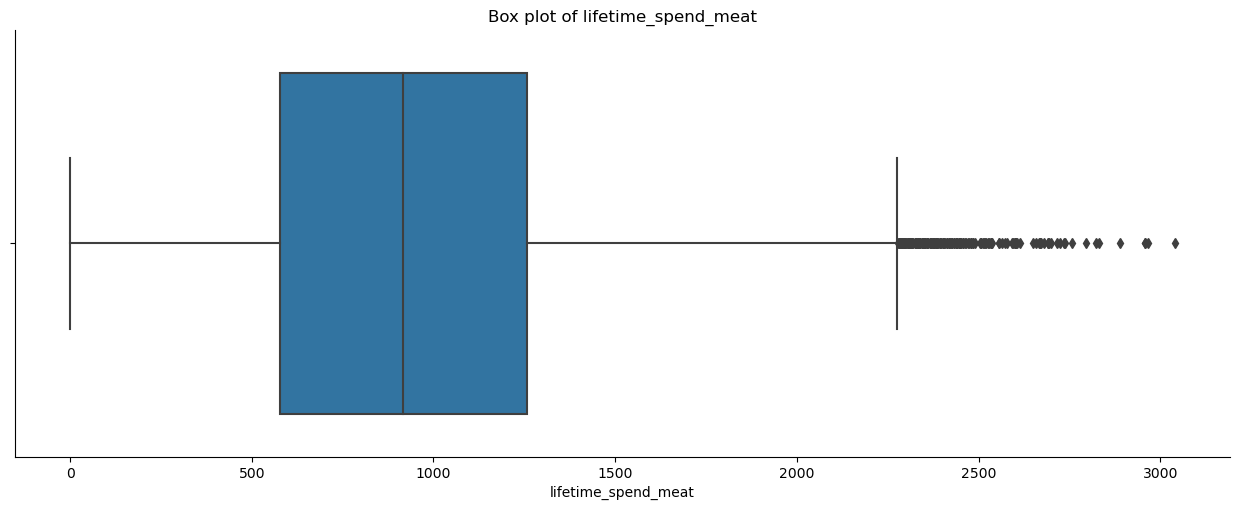

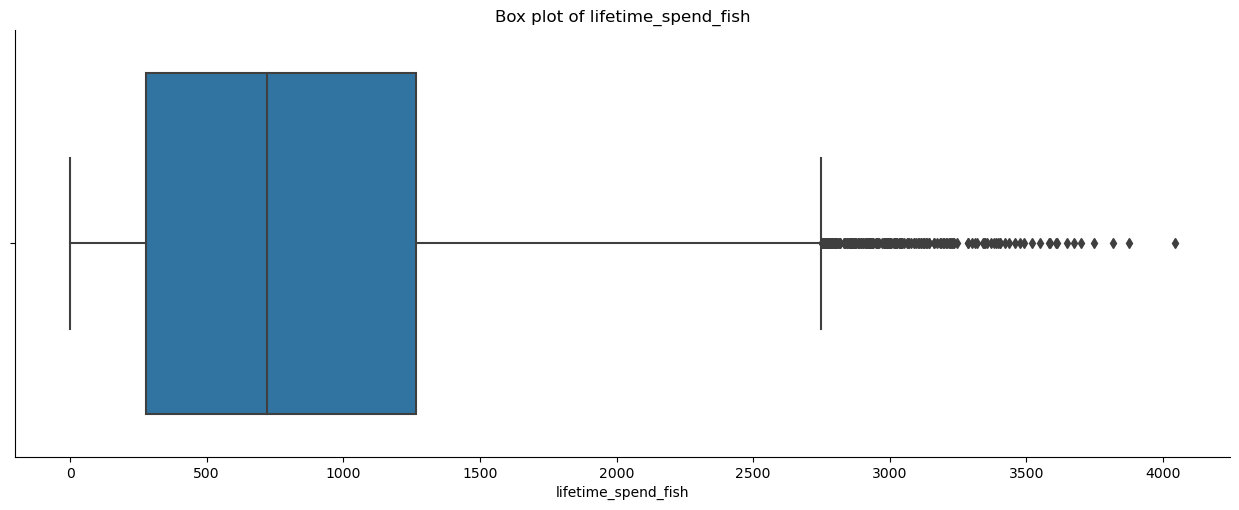

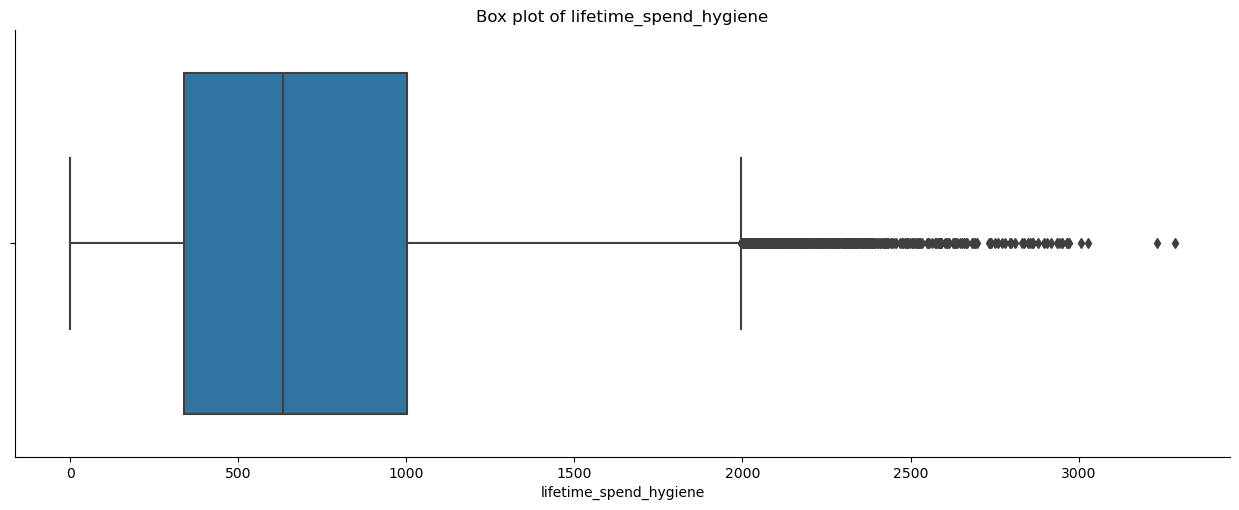

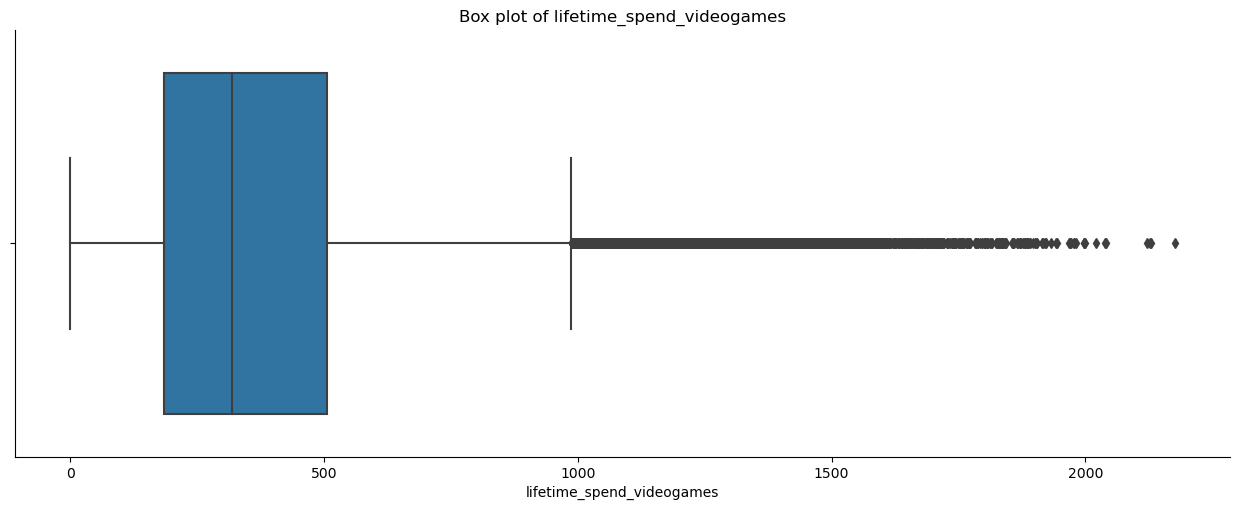

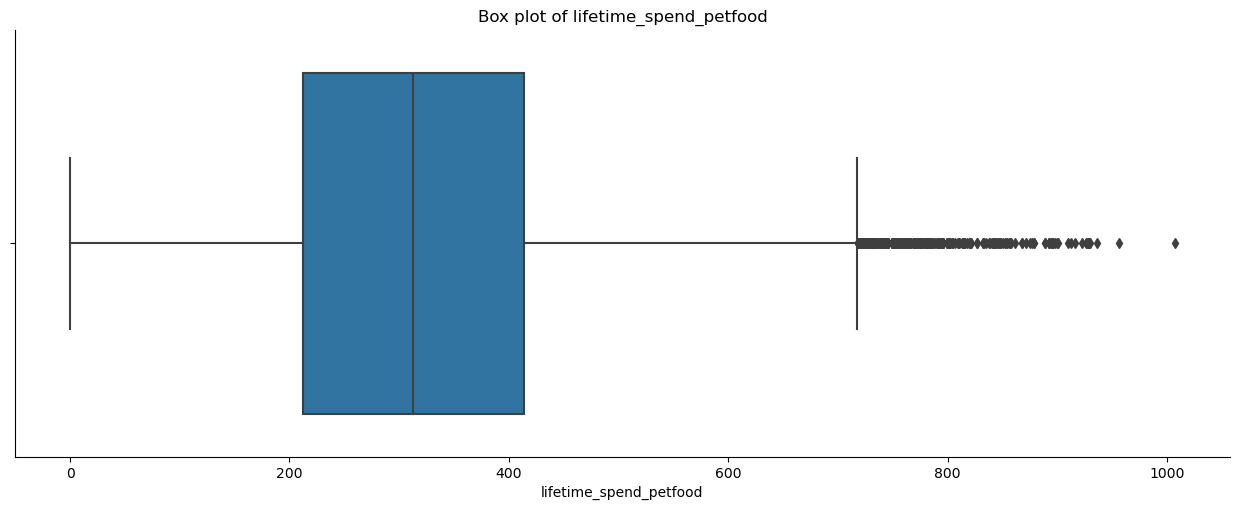

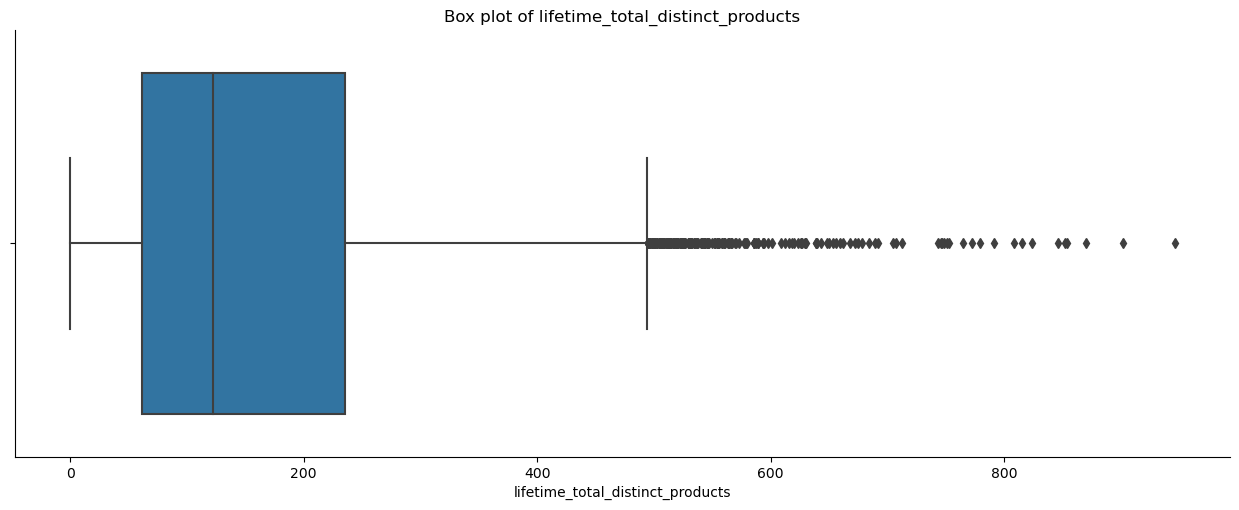

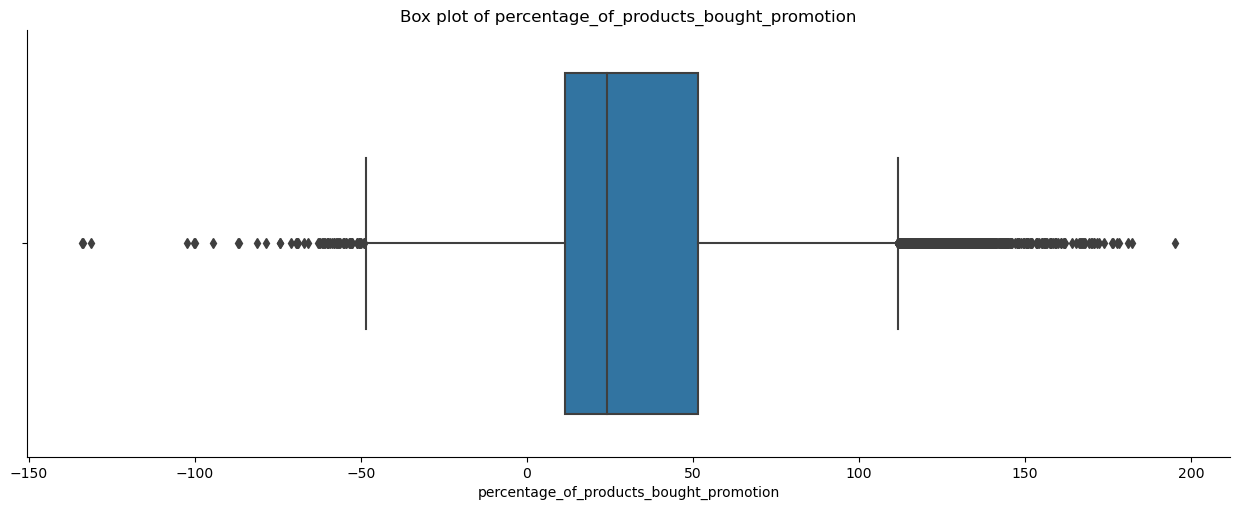

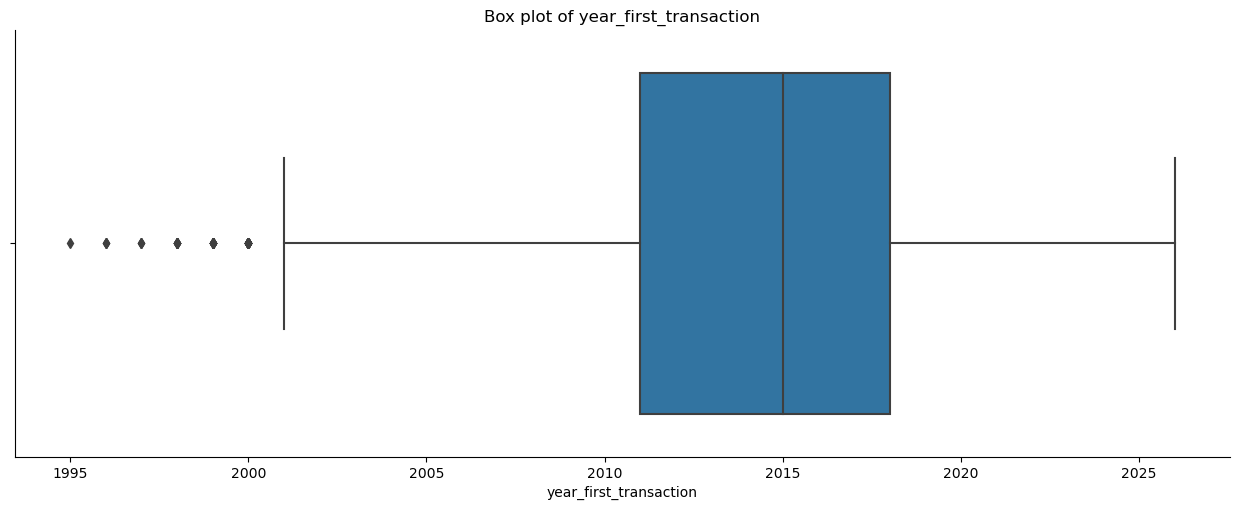

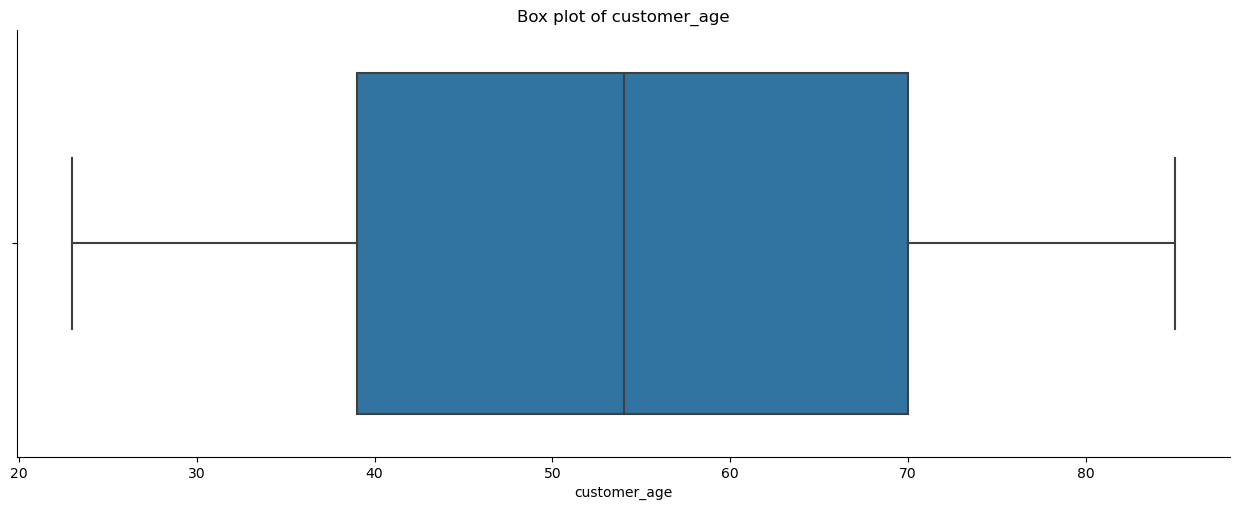

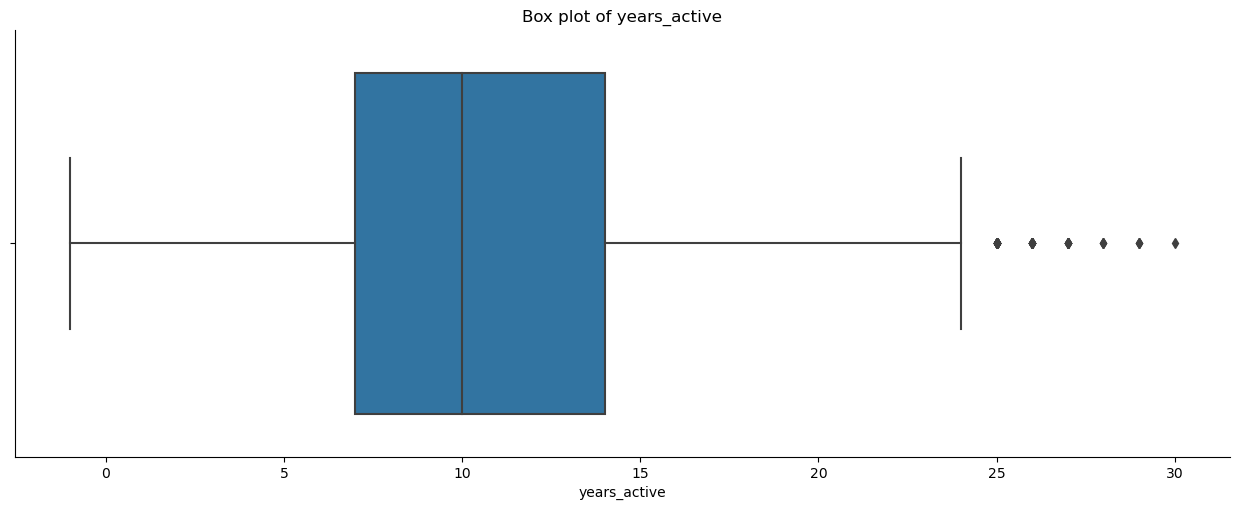

In [5]:
for var in df.describe().columns.drop(['customer_id','Unnamed: 0', 'customer_gender','loyalty_card_number','latitude', 'longitude']):
    sns.catplot(data=df, x=var, kind='box', height=5, aspect=2.5)
    plt.title(f'Box plot of {var}')
    plt.show()

Manual thresholding: <br>
-Percentage of products bought in promotion - todas negativas passar a zero <br>
-Life time spents - tetos nao muito fortes 

In [7]:
df.columns

Index(['Unnamed: 0', 'customer_id', 'customer_name', 'customer_gender',
       'customer_birthdate', 'kids_home', 'teens_home', 'number_complaints',
       'distinct_stores_visited', 'lifetime_spend_groceries',
       'lifetime_spend_electronics', 'typical_hour',
       'lifetime_spend_vegetables', 'lifetime_spend_nonalcohol_drinks',
       'lifetime_spend_alcohol_drinks', 'lifetime_spend_meat',
       'lifetime_spend_fish', 'lifetime_spend_hygiene',
       'lifetime_spend_videogames', 'lifetime_spend_petfood',
       'lifetime_total_distinct_products',
       'percentage_of_products_bought_promotion', 'year_first_transaction',
       'loyalty_card_number', 'latitude', 'longitude', 'customer_age',
       'years_active', 'customer_educlevel'],
      dtype='object')

In [17]:
def manual_outliers(df):
    manual_thresholds = {
        'lifetime_spend_groceries': 140000,
        'lifetime_spend_electronics': 30000,
        'lifetime_spend_vegetables': 4000,
        'lifetime_spend_nonalcohol_drinks': 1600,
        'lifetime_spend_alcohol_drinks': 4000,
        'lifetime_spend_meat': 2800,
        'lifetime_spend_fish': 3600,
        'lifetime_spend_hygiene': 3000,
        'lifetime_spend_videogames': 2000,
        'lifetime_spend_petfood': 900,
        'lifetime_total_distinct_products': 800,
    }

    for col, threshold in manual_thresholds.items():
        df[col] = df[col].clip(upper=threshold)
    
    df['percentage_of_products_bought_promotion'] = df['percentage_of_products_bought_promotion'].clip(lower=0)
    
    return(df)


<b> Multidimentional Outliers

In [6]:
#sns.pairplot(df.drop(columns =['customer_id','Unnamed: 0', 'kids_home', 'teens_home', 'customer_gender','loyalty_card_number','latitude', 'longitude']), palette=['blue', 'green', 'red', 'purple', 'yellow', 'pink', 'black'], height=5)